# Exercise 1.3

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import scipy.io
plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams.update({'font.size': 18})

mat_contents = scipy.io.loadmat(os.path.join('allFaces.mat'))
X = mat_contents['faces']
X3 = np.array(X, dtype=np.float64)
m = int(mat_contents['m'])
n = int(mat_contents['n'])

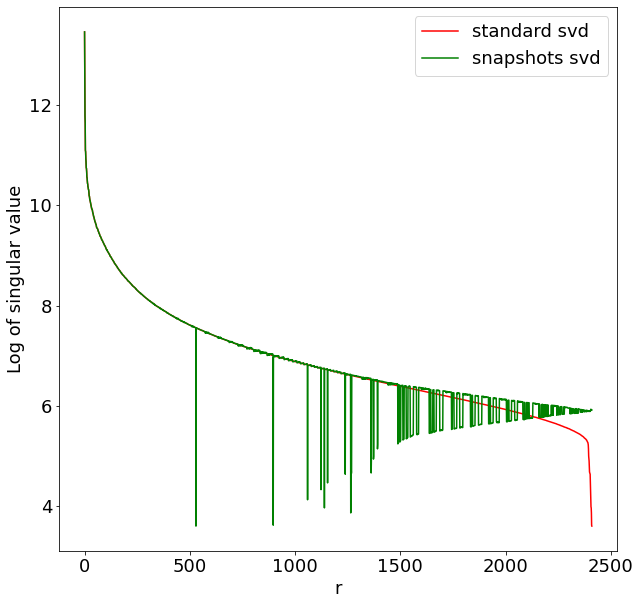

In [2]:
U3, S3, VT3 = np.linalg.svd(X3,full_matrices=False) # economy svd
e_vals,e_vecs = np.linalg.eig(X3.T.conjugate()@X3) # method of snapshots
S4 = np.sqrt(e_vals) # singular values of the method of snapshots

plt.plot(np.arange(len(S3)), np.log(S3), color='red',label='standard svd')
plt.plot(np.arange(len(S4)), np.log(S4), color='green',label='snapshots svd')
plt.legend()
plt.xlabel('r')
plt.ylabel('Log of singular value')
plt.show()

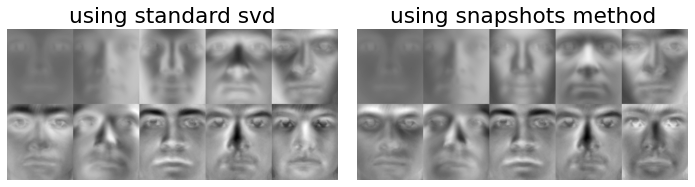

In [3]:
# the first 10 left singular vectors using standard svd
U3f=U3[:,:10]
U3f=np.transpose(U3f)
eigenfaces_svd=np.zeros((n*2,m*5))
t=0
for i in range(2):
      for j in range(5):
            ef = np.transpose(U3f[t])
            im = np.reshape(ef,(m,n))
            eigenfaces_svd[i*n:(i+1)*n,j*m:(j+1)*m]=np.transpose(im)
            t += 1
#plt.subplots_adjust(hspace=4, wspace=10)            
ax1 = plt.subplot(1, 2, 1)
plt.title('using standard svd')            
img = plt.imshow(eigenfaces_svd)
img.set_cmap('gray')
plt.axis('off')


# the first 10 left singular vectors using snapshots svd
r=np.count_nonzero(e_vals)
svd4=np.diag(1./(S4[:r]))
U4f= X3 @ e_vecs[:,:10]@ svd4[:10,:10]
U4f=np.transpose(U4f)
eigenfaces_snsvd=np.zeros((n*2,m*5))
e=0
for i in range(2):
      for j in range(5):
            ef1 = np.transpose(U4f[e])
            im1 = np.reshape(ef1,(m,n))
            eigenfaces_snsvd[i*n:(i+1)*n,j*m:(j+1)*m]=np.transpose(im1)
            e += 1
ax2 = plt.subplot(1, 2, 2) 
plt.title('using snapshots method')
img = plt.imshow(eigenfaces_snsvd)
img.set_cmap('gray')
plt.axis('off')
plt.tight_layout()
plt.show()

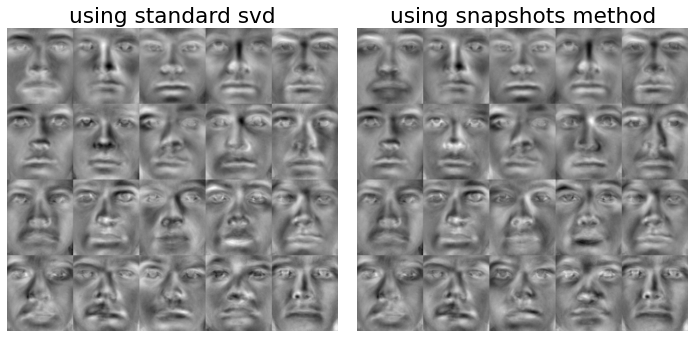

In [4]:
# the first 11-30 left singular vectors using standard svd
k=30
U5f=U3[:,10:k]
U5f=np.transpose(U5f)
eigenfaces_svd1=np.zeros((n*4,m*5))
f=0
for i in range(4):
      for j in range(5):
            ef2 = np.transpose(U5f[f])
            im2 = np.reshape(ef2,(m,n))
            eigenfaces_svd1[i*n:(i+1)*n,j*m:(j+1)*m]=np.transpose(im2)
            f += 1
ax1 = plt.subplot(1, 2, 1)
plt.title('using standard svd')
img = plt.imshow(eigenfaces_svd1)
img.set_cmap('gray')
plt.axis('off')


# the first 11-30 left singular vectors using snapshots svd
r=np.count_nonzero(e_vals)
svd4=np.diag(1./(S4[:r]))
U6f= X3 @ e_vecs[:,:k]@ svd4[:k,:k]
U6f=U6f[:,10:k]
U6f=np.transpose(U6f)
eigenfaces_snsvd1=np.zeros((n*4,m*5))
g=0
for i in range(4):
      for j in range(5):
            ef3 = np.transpose(U6f[g])
            im3 = np.reshape(ef3,(m,n))
            eigenfaces_snsvd1[i*n:(i+1)*n,j*m:(j+1)*m]=np.transpose(im3)
            g += 1
ax1 = plt.subplot(1, 2, 2)
plt.title('using snapshots method')
img = plt.imshow(eigenfaces_snsvd1)
img.set_cmap('gray')
plt.axis('off')
plt.tight_layout()
plt.show()

## Findings

In the first ten, there are still several different eigenfaces obtained by two methods. But the eleventh to thirtieth eigenfaces obtained by the two methods are almost the same.

# Exercise 1.4

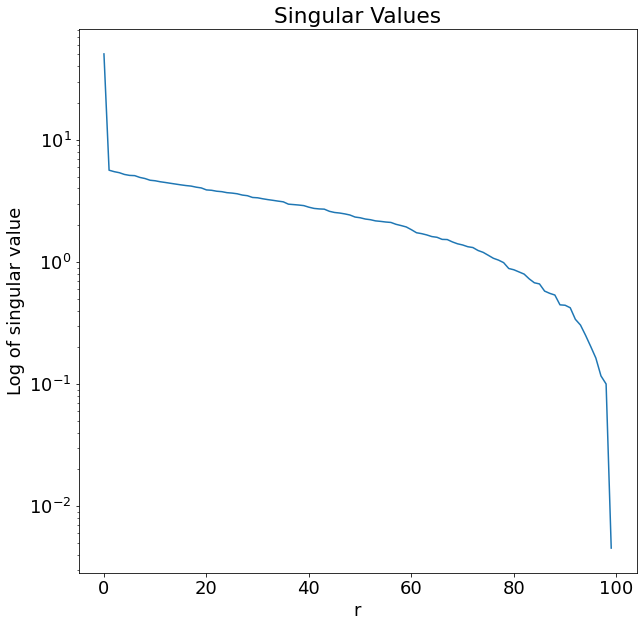

In [5]:
# plot the singular values of a random 100*100 matrix
import numpy as np
import matplotlib.pyplot as plt
XX = np.random.rand(100,100)
U5, S5, VT5 = np.linalg.svd(XX,full_matrices=True)
S5 = np.diag(S5)
plt.semilogy(np.diag(S5))
plt.title('Singular Values')
plt.xlabel('r')
plt.ylabel('Log of singular value')
plt.show()

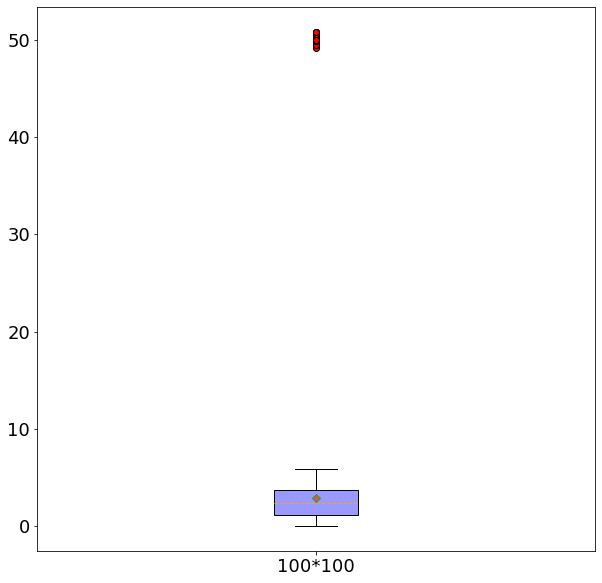

In [6]:
# plot the distribution of singular values in a box-and-whisker plot for 100*100 matrix
import numpy as np
import matplotlib.pyplot as plt
M100=np.zeros((100,100))
for i in range(100):
    XXX = np.random.rand(100,100)
    U, S100, VT = np.linalg.svd(XXX,full_matrices=True)
    M100[i,:]=S100
M100=M100.flatten()

plt.boxplot(x = M100, 
            patch_artist=True,
            labels = ['100*100'], 
            showmeans=True, 
            boxprops = {'color':'black','facecolor':'#9999ff'}, 
            flierprops = {'marker':'o','markerfacecolor':'red','color':'black'},
            meanprops = {'marker':'D','markerfacecolor':'indianred'},
            medianprops = {'linestyle':'--','color':'orange'})

plt.show()

#figure,axes=plt.subplots() 
#axes.boxplot(M100,patch_artist=True)

#plt.show() 

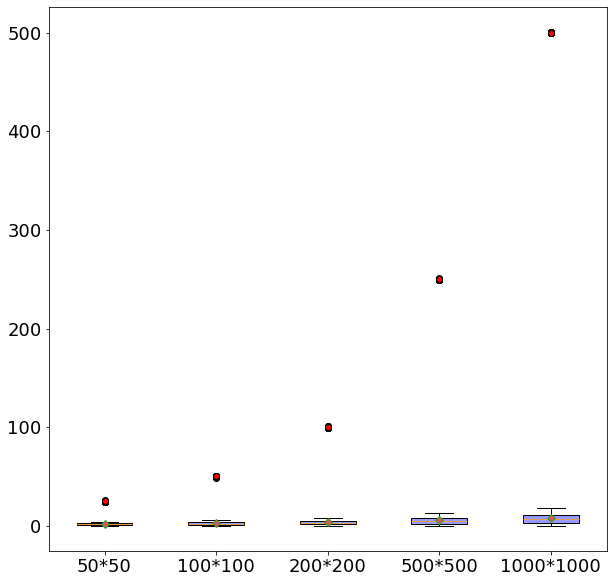

In [7]:
# plot the distribution of singular values in a box-and-whisker plot for 50*50, 100*100, 
# 200*200, 500*500 and 1000*1000 matrices
M50=np.zeros((100,50))
M200=np.zeros((100,200))
M500=np.zeros((100,500))
M1000=np.zeros((100,1000))
for i in range(100):
    X50 = np.random.rand(50,50)
    X200 = np.random.rand(200,200)
    X500 = np.random.rand(500,500)
    X1000 = np.random.rand(1000,1000)
    U50, S50, VT50 = np.linalg.svd(X50,full_matrices=True)
    U200, S200, VT200 = np.linalg.svd(X200,full_matrices=True)
    U500, S500, VT500 = np.linalg.svd(X500,full_matrices=True)
    U1000, S1000, VT1000 = np.linalg.svd(X1000,full_matrices=True)
    M50[i,:]=S50
    M200[i,:]=S200
    M500[i,:]=S500
    M1000[i,:]=S1000
M50=M50.flatten()
M200=M200.flatten()
M500=M500.flatten()
M1000=M1000.flatten()
plt.boxplot(x = [M50,M100,M200,M500,M1000 ],
            patch_artist=True,
            labels = ['50*50', '100*100','200*200','500*500','1000*1000'], 
            showmeans=True, 
            boxprops = {'color':'black','facecolor':'#9999ff'}, 
            flierprops = {'marker':'o','markerfacecolor':'red','color':'black'},
            meanprops = {'marker':'D','markerfacecolor':'indianred'},
            medianprops = {'linestyle':'--','color':'orange'})

plt.show()


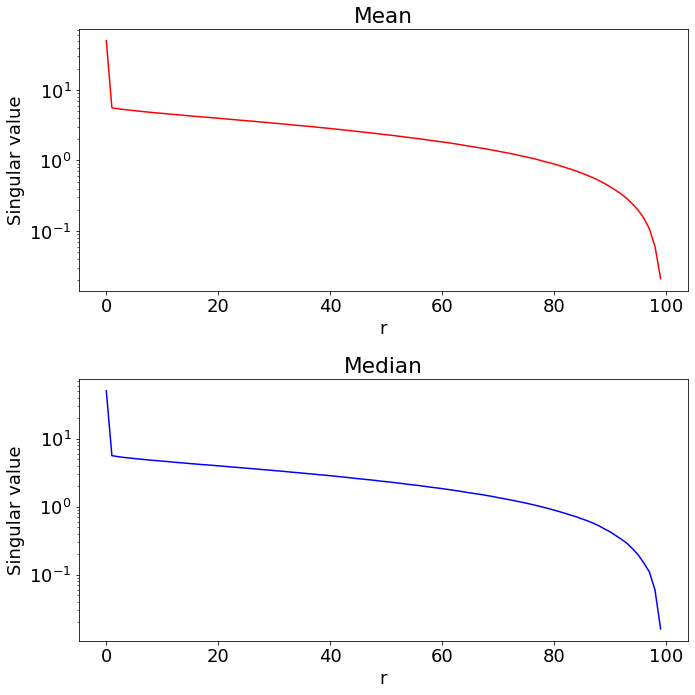

In [9]:
# plot the mean and median singular values as a function of r
import numpy as np
import matplotlib.pyplot as plt
M= np.zeros((100,100))
for i in range(100):
    XXX = np.random.rand(100,100)
    U, S42, VT = np.linalg.svd(XXX,full_matrices=True)
    M[i,:]=S42

Mean=[]
Median=[]
for i in range(100):
      mean=np.mean(M[:,i])
      median=np.median(M[:,i])
      Mean.append(mean)
      Median.append(median)
ax1 = plt.subplot(2, 1, 1)
plt.semilogy(Mean,color='red')
plt.title('Mean')
plt.xlabel('r')
plt.ylabel('Singular value')
ax2 = plt.subplot(2, 1, 2)
plt.semilogy(Median,color='blue')
plt.title('Median')
plt.xlabel('r')
plt.ylabel('Singular value')
plt.tight_layout()
plt.show()